In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from dataset import Dataset
dataset = Dataset()

In [54]:
def get_image(patch, index):
    """
    Arguments:
      patch: patch image
      index: 0,1,2      
    """
    x = 5*index
    return patch[:, x:x+16].reshape([-1])

In [55]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [74]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.0005 # rの学習率
#k2 = 0.0001 # Uの学習率

k1 = 0.0005 # rの学習率
k2 = 0.0005 # Uの学習率

U_scale = 7.0
I_scale = 10.0

sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

#iteration = 40
iteration = 10
#iteration = 2

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    patch = dataset.patches[k]    
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = get_image(patch, j) * I_scale            
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=0.03032882181378793 std=2.0026971600441206
rs mean=-8.13177768271485e-17 std=1.1859239473080495e-15
us mean=0.030886612916672978 std=1.9837143307793135
rs mean=0.001874346868135035 std=0.03949529305100441
us mean=0.03065935388727955 std=1.9665436368515194
rs mean=0.016546620056033134 std=0.18656177818775177
us mean=0.032025074040235704 std=1.9508388684681226
rs mean=0.020409628748893738 std=0.27657270431518555
us mean=0.03562653052344726 std=1.9364233634090937
rs mean=-8.88677123582711e-17 std=1.3910804093307245e-15
us mean=0.03549583965532442 std=1.9224811530820047
rs mean=0.006044573616236448 std=0.128895565867424
us mean=0.05780263821528778 std=2.0690210520176158
rs mean=-0.02202766202390194 std=2.358912944793701
us mean=0.06441638862977739 std=2.3079156704717008
rs mean=-0.14333762228488922 std=1.5499294996261597
us mean=0.0746752316341602 std=2.411664392536314
rs mean=0.25056853890419006 std=1.2234188318252563
us mean=0.056269971287248706 std=2.4962978442340247
rs mean=0.0

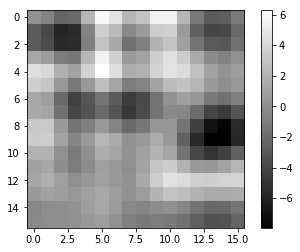

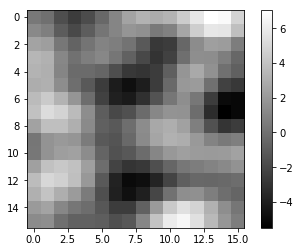

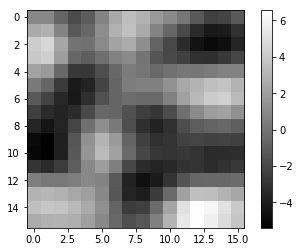

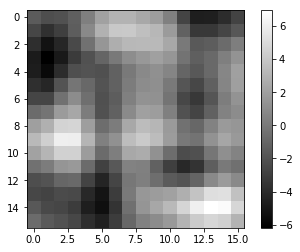

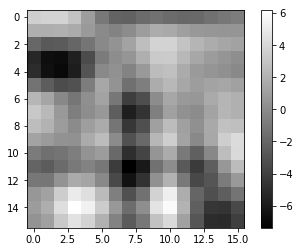

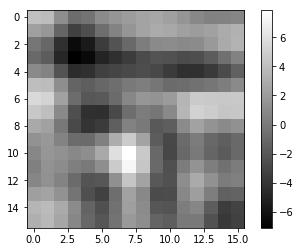

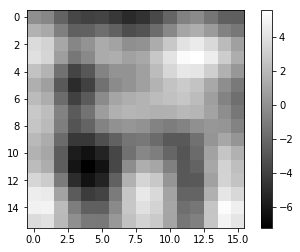

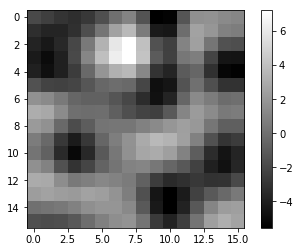

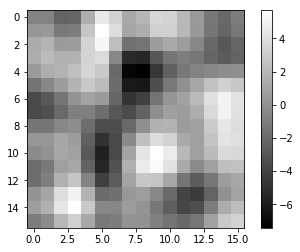

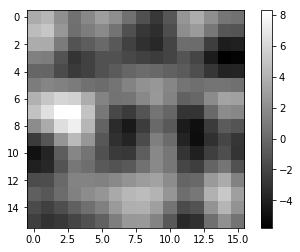

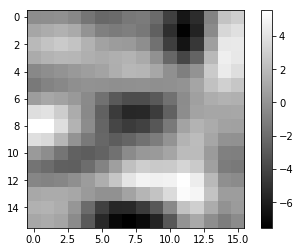

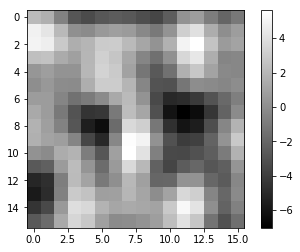

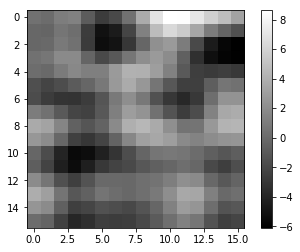

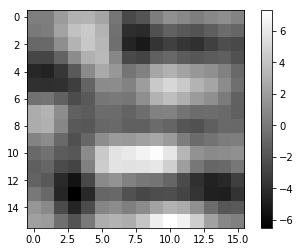

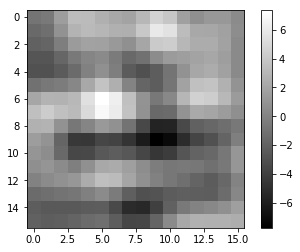

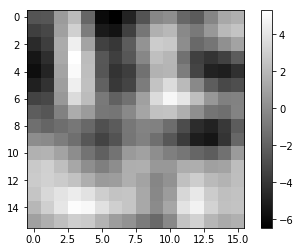

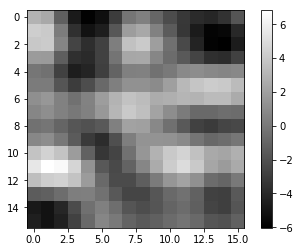

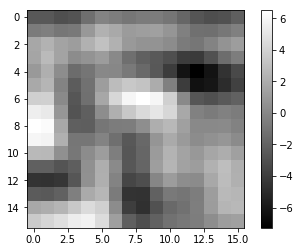

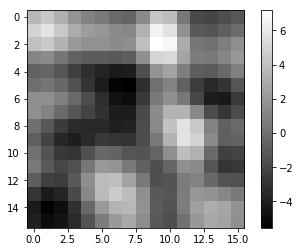

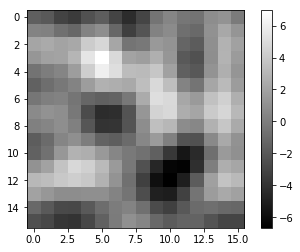

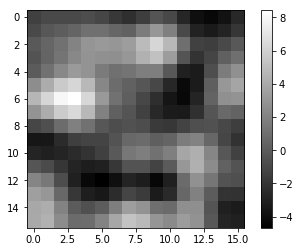

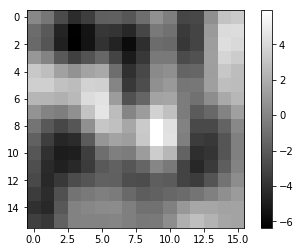

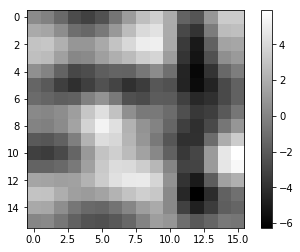

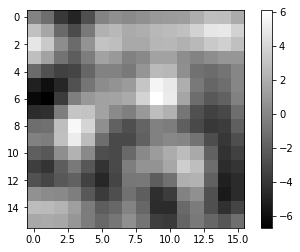

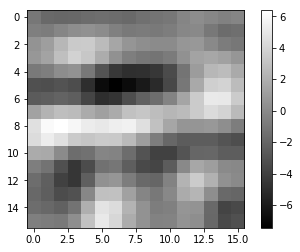

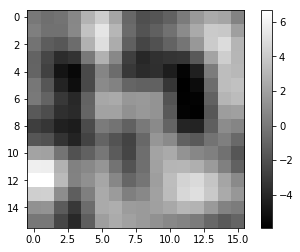

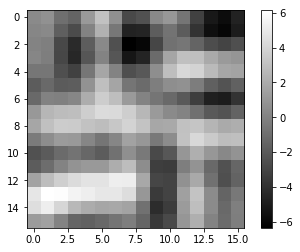

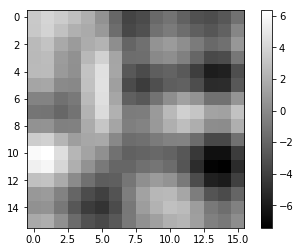

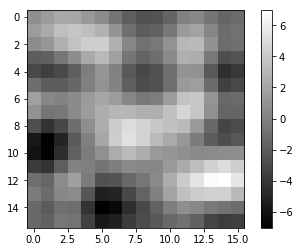

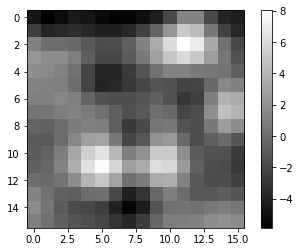

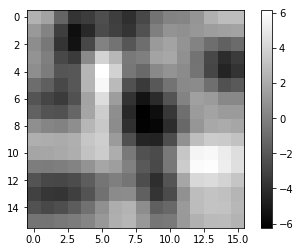

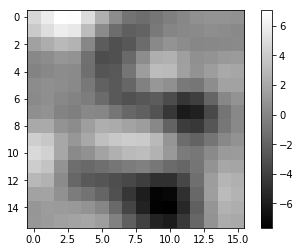

In [75]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

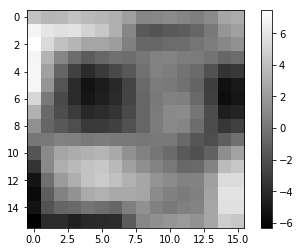

In [76]:
patch = dataset.patches[500]
for j in range(3):
    I = get_image(patch, j) * I_scale 
    
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[ 0.09830542  0.31295756 -0.00428101 -0.31496555  0.43004847  0.22444563
 -0.23762347  0.16904336  0.39002836 -0.40979338 -0.2608065  -0.02901636
 -0.52074265 -0.27575523  0.1204599  -0.01107636  0.06525902 -0.18039574
 -0.1878744   0.07481554  0.18608242 -0.11754934  0.1752383  -0.21839313
  0.00544277 -0.15208144  0.07929471  0.2364423  -0.12713258 -0.31478488
 -0.19143035 -0.0229309 ]
[ 0.09830542  0.31295756 -0.00428101 -0.31496555  0.43004847  0.22444563
 -0.23762347  0.16904336  0.39002836 -0.40979338 -0.2608065  -0.02901636
 -0.52074265 -0.27575523  0.1204599  -0.01107636  0.06525902 -0.18039574
 -0.1878744   0.07481554  0.18608242 -0.11754934  0.1752383  -0.21839313
  0.00544277 -0.15208144  0.07929471  0.2364423  -0.12713258 -0.31478488
 -0.19143035 -0.0229309 ]


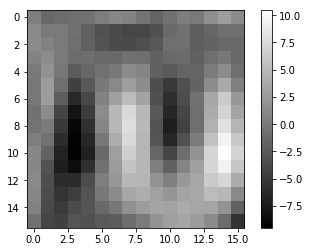

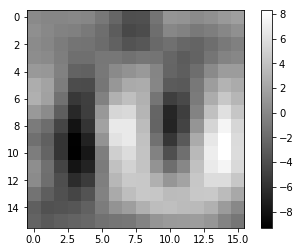

In [80]:
image_index = 501
patch = dataset.patches[image_index]
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(10):
    j = 0
    I = get_image(patch, j) * I_scale            
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    #dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * 0.000001 * r
    rs[j] += dr
    
print(rs[j])

U = Us[j]
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

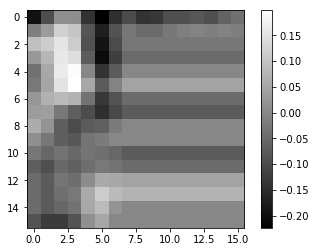

In [20]:
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()